In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00


=== Base Circuit ===
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts: {'11 00': 525, '00 00': 499}


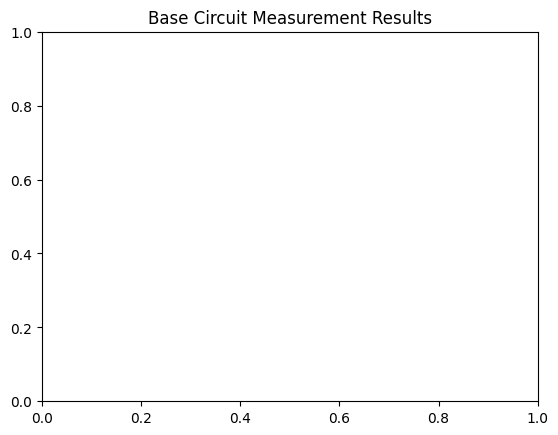


=== Task 1: Control/Target Variation (Swap Control and Target in CNOT & CZ) ===
        ┌───┐┌───┐       ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■──X──░─┤M├───
        └───┘└─┬─┘ │  │  ░ └╥┘┌─┐
   q_1: ───────■───■──X──░──╫─┤M├
                         ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts (Control/Target Swapped): {'00 00': 517, '10 00': 507}


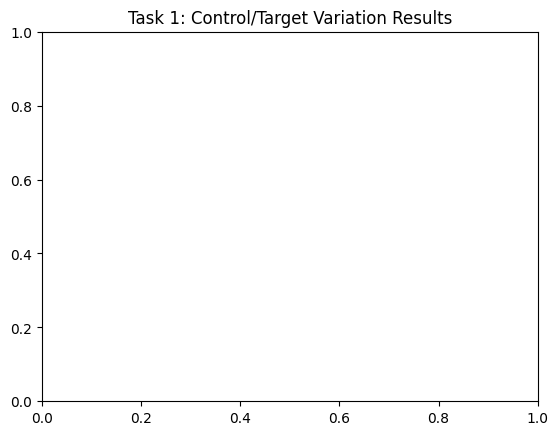


=== Task 2: Remove One Multi-Qubit Gate (Remove SWAP) ===
        ┌───┐         ░ ┌─┐   
   q_0: ┤ H ├──■───■──░─┤M├───
        └───┘┌─┴─┐ │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──░──╫─┤M├
             └───┘    ░  ║ └╥┘
   c: 2/═════════════════╬══╬═
                         ║  ║ 
meas: 2/═════════════════╩══╩═
                         0  1 
Measurement Counts (Without SWAP): {'11 00': 501, '00 00': 523}


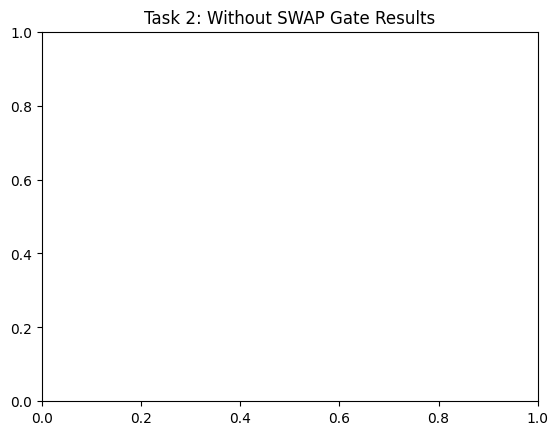


=== Task 3: Add Hadamard Gate on Second Qubit ===
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        ├───┤┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■──X──░──╫─┤M├
        └───┘└───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts (Added Hadamard on Qubit 1): {'00 00': 237, '10 00': 252, '11 00': 275, '01 00': 260}


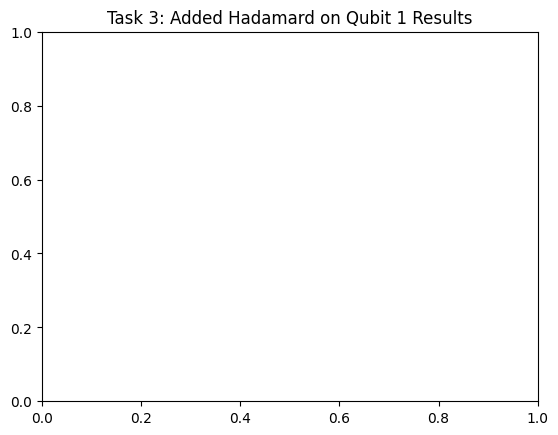

In [3]:
# ===============================================================
# Multi-Qubit Gate Experiments in Qiskit
# ===============================================================
# This notebook demonstrates how multi-qubit gates (CNOT, CZ, SWAP)
# affect entanglement and measurement outcomes.
#
# Students will perform:
#   1. Control/Target Variation
#   2. Gate Removal
#   3. Adding Another Hadamard Gate
# ===============================================================

# ===========================
# Install Qiskit and Aer
# ===========================
!pip install qiskit qiskit-aer --quiet --upgrade

# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
sim = AerSimulator()


# ===============================================================
# Base Circuit
# ===============================================================
print("=== Base Circuit ===")

# Create a 2-qubit circuit with 2 classical bits
qc = QuantumCircuit(2, 2)

# --- Apply multi-qubit gates ---
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT with control 0, target 1
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # Swap qubits 0 and 1

# Measure both qubits
qc.measure_all()

# Display the circuit
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# Display measurement results
print("Measurement Counts:", counts)
plot_histogram(counts)
plt.title("Base Circuit Measurement Results")
plt.show()

# ===============================================================
# 🧩 Student Task 1: Control/Target Variation
# ===============================================================
print("\n=== Task 1: Control/Target Variation (Swap Control and Target in CNOT & CZ) ===")

qc_task1 = QuantumCircuit(2, 2)

qc_task1.h(0)        # Same Hadamard on qubit 0
qc_task1.cx(1, 0)    # Control qubit 1 → Target qubit 0 (reversed)
qc_task1.cz(1, 0)    # Controlled-Z with reversed control/target
qc_task1.swap(0, 1)  # Keep SWAP same
qc_task1.measure_all()

print(qc_task1.draw())

compiled_task1 = transpile(qc_task1, sim)
result_task1 = sim.run(compiled_task1, shots=1024).result()
counts_task1 = result_task1.get_counts()

print("Measurement Counts (Control/Target Swapped):", counts_task1)
plot_histogram(counts_task1)
plt.title("Task 1: Control/Target Variation Results")
plt.show()

# Observation:
# Changing control and target reverses which qubit influences the other,
# altering correlation patterns in the output.


# ===============================================================
# 🚫 Student Task 2: Gate Removal
# ===============================================================
print("\n=== Task 2: Remove One Multi-Qubit Gate (Remove SWAP) ===")

qc_task2 = QuantumCircuit(2, 2)

qc_task2.h(0)
qc_task2.cx(0, 1)
qc_task2.cz(0, 1)
# Removed SWAP gate
qc_task2.measure_all()

print(qc_task2.draw())

compiled_task2 = transpile(qc_task2, sim)
result_task2 = sim.run(compiled_task2, shots=1024).result()
counts_task2 = result_task2.get_counts()

print("Measurement Counts (Without SWAP):", counts_task2)
plot_histogram(counts_task2)
plt.title("Task 2: Without SWAP Gate Results")
plt.show()

# Observation:
# Removing SWAP changes which qubits' states are exchanged,
# affecting the final measurement correlations.


# ===============================================================
# ✳️ Student Task 3: Add Another Hadamard
# ===============================================================
print("\n=== Task 3: Add Hadamard Gate on Second Qubit ===")

qc_task3 = QuantumCircuit(2, 2)

qc_task3.h(0)        # Hadamard on qubit 0
qc_task3.h(1)        # New Hadamard on qubit 1
qc_task3.cx(0, 1)    # CNOT with control 0, target 1
qc_task3.cz(0, 1)
qc_task3.swap(0, 1)
qc_task3.measure_all()

print(qc_task3.draw())

compiled_task3 = transpile(qc_task3, sim)
result_task3 = sim.run(compiled_task3, shots=1024).result()
counts_task3 = result_task3.get_counts()

print("Measurement Counts (Added Hadamard on Qubit 1):", counts_task3)
plot_histogram(counts_task3)
plt.title("Task 3: Added Hadamard on Qubit 1 Results")
plt.show()

# Observation:
# Adding a Hadamard on the second qubit introduces an extra superposition,
# which can increase randomness or modify entanglement in the outcomes.